In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
AW_data = pd.read_csv('C:/Users/user/Downloads/AW_dataset.csv', sep=',', index_col=0)
AW_data.head(); AW_data.columns


Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'CustomerAge', 'CustomerAgegr',
       'BikeBuyer'],
      dtype='object')

In [3]:
labels = AW_data.iloc[:,-1].values
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [4]:
features = AW_data.iloc[:,:-1]
features.drop(['CustomerID','Title','FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','StateProvinceName','PostalCode','PhoneNumber','BirthDate',
               'HomeOwnerFlag','CustomerAge','TotalChildren'], inplace=True, axis='columns')
features

,City,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AveMonthSpend,CustomerAgegr
0,Rockhampton,Australia,Bachelors,Professional,M,M,0,0,137947,89,Between 25-45
1,Seaford,Australia,Bachelors,Professional,M,S,1,3,101141,117,Between 25-45
2,Hobart,Australia,Bachelors,Professional,M,M,1,3,91945,123,Between 25-45
3,North Ryde,Australia,Bachelors,Professional,F,S,1,0,86688,50,Between 25-45
4,Wollongong,Australia,Bachelors,Professional,F,S,4,5,92771,95,Between 25-45
5,East Brisbane,Australia,Bachelors,Professional,M,S,1,0,103199,78,Between 25-45
6,Matraville,Australia,Bachelors,Professional,F,S,1,0,84756,54,Between 25-45
7,Warrnambool,Australia,Bachelors,Professional,M,M,2,3,109759,130,Between 25-45
8,Bendigo,Australia,Bachelors,Professional,F,S,3,4,88005,85,Between 25-45
9,Hervey Bay,Australia,Bachelors,Professional,M,S,1,0,106399,74,Between 25-45


In [5]:
Numeric = ['NumberCarsOwned','NumberChildrenAtHome','YearlyIncome','AveMonthSpend']
Numeric

['NumberCarsOwned', 'NumberChildrenAtHome', 'YearlyIncome', 'AveMonthSpend']

In [6]:
Bikebuyercounts = AW_data[['BikeBuyer','CustomerID']].groupby('BikeBuyer').count()
Bikebuyercounts
#There exists a class imbalance - 33% of the customers don't buy bicycle

,CustomerID
BikeBuyer,
0,10949
1,5455


In [7]:
def encstring(cat_feature):
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder()
    enc.fit(cat_feature.reshape(-1,1))
    feature = enc.transform(cat_feature.reshape(-1,1)).toarray()
    return feature

c = encstring(AW_data['CountryRegionName'].values)

In [8]:
Feature = ['City','Education','Occupation','Gender','MaritalStatus','CustomerAgegr']

def encodestring(cat_feature):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(cat_feature)
    feature = encoder.transform(cat_feature)
    
    enc = OneHotEncoder()
    enc.fit(feature.reshape(-1,1))
    feature=enc.transform(feature.reshape(-1,1)).toarray()
    return feature

In [9]:
encodestring(AW_data['CountryRegionName'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [10]:
feat = encodestring(AW_data['CountryRegionName'])
for col in Feature:
    temp = encodestring(AW_data[col])
    feat = np.concatenate([feat, temp], axis=1)
feat.shape
print(feat)
feat =  np.concatenate([feat,np.array(AW_data[Numeric])], axis =1)
feat.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(16404, 295)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feat,labels, test_size=0.3)

In [12]:
X_train[:,-4:]

array([[2.0000e+00, 0.0000e+00, 2.3388e+04, 4.0000e+01],
       [0.0000e+00, 1.0000e+00, 6.4959e+04, 5.3000e+01],
       [0.0000e+00, 0.0000e+00, 3.3300e+04, 4.3000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 5.4988e+04, 4.9000e+01],
       [2.0000e+00, 0.0000e+00, 5.6749e+04, 4.7000e+01],
       [1.0000e+00, 0.0000e+00, 9.9931e+04, 8.0000e+01]])

In [13]:
from sklearn.preprocessing import scale as sc
X_train[:,-4:] = sc(X_train[:,-4:])
X_test[:,-4:] = sc(X_test[:,-4:])

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print(Y_pred.reshape(-1,1))
#print(classifier.predict_proba(X_test))
#print(classifier.intercept_)
#print(classifier.coef_)
#for i in range(len(X_test)):
 #   print('Predicted=%s' %(Y_pred[i]))

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support as prfs
cm = confusion_matrix(Y_test,Y_pred)
ac = accuracy_score(Y_test,Y_pred)
prf = prfs(Y_test,Y_pred)
print('cm=%s, ac=%s' % (cm,ac))
prf

#the customers 59% of customers who would buy products are wrongly classified.
#the model seems not be working then

cm=[[2953  370]
 [ 656  943]], ac=0.7915481511580659


(array([0.8182322 , 0.71820259]),
 array([0.88865483, 0.58974359]),
 array([0.85199077, 0.64766484]),
 array([3323, 1599], dtype=int64))

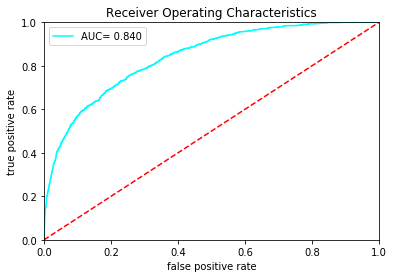

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,classifier.predict_proba(X_test)[:,1])
fpr, tpr, threshold
auc = auc(fpr,tpr)

#Plot the results
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,color='cyan', label='AUC= %0.3f' %auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.legend()
plt.show()


### Adjusting for Class Imbalance

In [18]:
classifier = LogisticRegression(C=1.0, class_weight={0:0.35,1:0.65})
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
cm = confusion_matrix(Y_test,Y_pred)
ac = accuracy_score(Y_test,Y_pred)
prf = prfs(Y_test,Y_pred)
print('cm=%s, ac=%s' % (cm,ac))
prf

cm=[[2617  706]
 [ 461 1138]], ac=0.7629012596505486


(array([0.85022742, 0.61713666]),
 array([0.78754138, 0.71169481]),
 array([0.81768474, 0.66105141]),
 array([3323, 1599], dtype=int64))

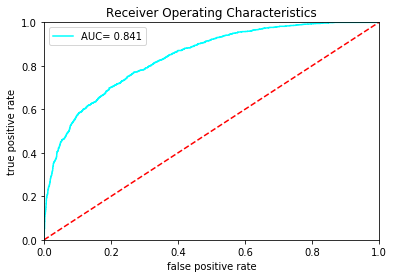

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,classifier.predict_proba(X_test)[:,1])
fpr, tpr, threshold
auc = auc(fpr,tpr)

#Plot the results
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,color='cyan', label='AUC= %0.3f' %auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.legend()
plt.show()

#### Adjusting the Threshold value

In [21]:
probabilites = classifier.predict_proba(X_test)
def score_model(threshold):
    score = np.array([1 if x> threshold else 0  for x in probabilites[:,1]])
    print(sum(score), 'Predicted Number of people that bought')
    print(str(len(score)-sum(score)) + 'Predicted Number of poeple that didn\'t buy')
    return score
#score_model(0.5)
print(score_model(0.5))
print(Y_pred)

1844 Predicted Number of people that bought
3078Predicted Number of poeple that didn't buy
[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [25]:
threshold = [0.25,0.3,0.35,0.4,0.45,0.5]
safe = []

for i in threshold:
    print('threshold value=%s' %i)
    score = score_model(i)
    safe.append(score)
    pfs = prfs(Y_test,score)
    print('accuracy score', accuracy_score(Y_test,score))
    print('precision scores',pfs[0])
    print('Specifity or Sensitivity',pfs[1])
    print('fscores',pfs[2])
    print('Actual',pfs[3])
    print()
    print('Confusion Matrix')
    print(confusion_matrix(Y_test,score))
    print();print()


threshold value=0.25
3145 Predicted Number of people that bought
1777Predicted Number of poeple that didn't buy
accuracy score 0.6355140186915887
precision scores [0.93021947 0.46899841]
Specifity or Sensitivity [0.49744207 0.92245153]
fscores [0.64823529 0.62183811]
Actual [3323 1599]

Confusion Matrix
[[1653 1670]
 [ 124 1475]]


threshold value=0.3
2857 Predicted Number of people that bought
2065Predicted Number of poeple that didn't buy
accuracy score 0.6684274685087362
precision scores [0.9094431  0.49422471]
Specifity or Sensitivity [0.56515197 0.88305191]
fscores [0.69710468 0.63375224]
Actual [3323 1599]

Confusion Matrix
[[1878 1445]
 [ 187 1412]]


threshold value=0.35
2562 Predicted Number of people that bought
2360Predicted Number of poeple that didn't buy
accuracy score 0.7007314099959366
precision scores [0.89194915 0.52459016]
Specifity or Sensitivity [0.63346374 0.84052533]
fscores [0.74080591 0.64599856]
Actual [3323 1599]

Confusion Matrix
[[2105 1218]
 [ 255 1344]]



In [ ]:
##Writing to Excel

In [26]:
import win32clipboard as clipboard:

def toClipboardForExcel

[array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 0, 0, 0])]

In [1]:
import xlsxwriter
workbook = xlsxwriter.Workbook('results.xlsx')
worksheet = workbook.add_worksheet()
row =0
for col, data  in enumerate(safe):
    worksheet.write_column(row,col,data)
workbook.close()
    

ModuleNotFoundError: No module named 'xlsxwriter'

### Cross validation

In [46]:
metric = prfs(Y_test,Y_pred)
print('Macro precision %0.4f' % (metric[1].mean())) #Average precision
print('Macro recall %0.4f' % (metric[2].mean())) #Average recall
#'Macro recall %0.5f' % float(float())
metric

Macro precision 0.7496
Macro recall 0.7394


(array([0.85022742, 0.61713666]),
 array([0.78754138, 0.71169481]),
 array([0.81768474, 0.66105141]),
 array([3323, 1599], dtype=int64))

In [51]:
from sklearn.model_selection import cross_validate as cv
labels = labels.reshape(labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
classifier = LogisticRegression(C = 1.0, class_weight = {0:0.35, 1:0.65}) 
scores = cv(classifier, feat, labels, scoring=scoring,
                        cv=10, return_train_score=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [54]:
scores

{'fit_time': array([0.23589134, 0.20708489, 0.20843935, 0.25273633, 0.18693972,
        0.25082898, 0.25034928, 0.2514782 , 0.18749785, 0.28384948]),
 'score_time': array([0.01562166, 0.        , 0.        , 0.00799966, 0.01562405,
        0.01199865, 0.015625  , 0.00799942, 0.01562643, 0.01298928]),
 'test_precision_macro': array([0.73501424, 0.74001935, 0.73918754, 0.74472455, 0.74900425,
        0.75483234, 0.75157419, 0.7199061 , 0.72988787, 0.75887306]),
 'test_recall_macro': array([0.73054092, 0.74154248, 0.74522053, 0.75760199, 0.74426464,
        0.75219723, 0.74576683, 0.70909053, 0.72838591, 0.75026668]),
 'test_roc_auc': array([0.80784284, 0.81959456, 0.81864452, 0.84286216, 0.83889809,
        0.82889866, 0.83112563, 0.80679821, 0.80706464, 0.83392818])}

In [55]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores)    

         Precision     Recall       AUC
Fold  1    0.735        0.731      0.808
Fold  2    0.740        0.742      0.820
Fold  3    0.739        0.745      0.819
Fold  4    0.745        0.758      0.843
Fold  5    0.749        0.744      0.839
Fold  6    0.755        0.752      0.829
Fold  7    0.752        0.746      0.831
Fold  8    0.720        0.709      0.807
Fold  9    0.730        0.728      0.807
Fold 10    0.759        0.750      0.834
----------------------------------------
Mean       0.742        0.740      0.824
Std        0.011        0.013      0.013


### Optimize Hyperparameter

In [59]:
from sklearn.model_selection import KFold, GridSearchCV
#inner fold
inside = KFold(n_splits = 10, shuffle =True)
#outer fold
outside = KFold(n_splits = 10, shuffle = True)
outside

KFold(n_splits=10, random_state=None, shuffle=True)

In [73]:
param_grid = {'C':[0.1,1,10,100,1000]}
classifier = LogisticRegression(class_weight={0:0.35,1:0.65})
#Performing of grid search over the parameters
optimized_param = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=inside,
                              scoring='roc_auc', return_train_score=True)
optimized_param

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight={0: 0.35, 1: 0.65}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [74]:
optimized_param.fit(feat,labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight={0: 0.35, 1: 0.65}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [75]:
keys =list(optimized_param.cv_results_.keys()); #keys
for key in keys[6:16]:
    print(optimized_param.cv_results_[key])
optimized_param.best_estimator_.C

[0.81257344 0.81233201 0.81231006 0.81230161 0.81229993]
[0.828235   0.82793574 0.8279126  0.82791094 0.82791094]
[0.81664593 0.81644352 0.81642029 0.81642029 0.81641863]
[0.83062558 0.83041755 0.83040936 0.83040936 0.83040772]
[0.80595197 0.80585442 0.8058376  0.80583592 0.80583592]
[0.83072712 0.83056244 0.83054732 0.83055068 0.83055068]
[0.84208079 0.84207913 0.84204924 0.84206086 0.84206418]
[0.82776918 0.82776227 0.82776399 0.82776227 0.82776399]
[0.83193471 0.83187043 0.83186028 0.8318552  0.8318552 ]
[0.82153051 0.82120632 0.82116621 0.82116454 0.82116454]


0.1

In [83]:
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(C=0.1, class_weight={0:0.35,1:0.65})
cv_estimate = cross_val_score(classifier,feat,labels,cv=outside)

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))
    
##OR
cv_estimated = cv(classifier,feat,labels,cv=outside,scoring=scoring,
                             return_train_score=False)
print_cv(cv_estimated)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Mean performance metric = 0.770
SDT of the metric       = 0.012
Outcomes by cv fold
Fold  1    0.776
Fold  2    0.758
Fold  3    0.777
Fold  4    0.787
Fold  5    0.751
Fold  6    0.764
Fold  7    0.763
Fold  8    0.765
Fold  9    0.764
Fold 10    0.793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

         Precision     Recall       AUC
Fold  1    0.744        0.745      0.841
Fold  2    0.759        0.767      0.836
Fold  3    0.749        0.751      0.825
Fold  4    0.750        0.755      0.833
Fold  5    0.738        0.728      0.816
Fold  6    0.744        0.736      0.830
Fold  7    0.758        0.744      0.830
Fold  8    0.732        0.719      0.805
Fold  9    0.745        0.733      0.813
Fold 10    0.718        0.709      0.781
----------------------------------------
Mean       0.744        0.739      0.821
Std        0.012        0.016      0.017


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Final Model Training and Evaluation

In [90]:
classifier = LogisticRegression(C=0.1, class_weight={0:0.35,1:0.65})
classifier.fit(X_train,Y_train)

def Y_pred():
    probabilites = classifier.predict_proba(X_test)
    threshold = [0.25,0.3,0.35,0.4,0.45,0.5]
    safe = []

    for i in threshold:
        print('threshold value=%s' %i)
        score = score_model(i)
        safe.append(score)
        pfs = prfs(Y_test,score)
        print('accuracy score', accuracy_score(Y_test,score))
        print('precision scores',pfs[0])
        print('Specifity or Sensitivity',pfs[1])
        print('fscores',pfs[2])
        print('Actual',pfs[3])
        print()
        print('Confusion Matrix')
        print(confusion_matrix(Y_test,score))
        print();print()
Y_pred()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


threshold value=0.25
3145 Predicted Number of people that bought
1777Predicted Number of poeple that didn't buy
accuracy score 0.6355140186915887
precision scores [0.93021947 0.46899841]
Specifity or Sensitivity [0.49744207 0.92245153]
fscores [0.64823529 0.62183811]
Actual [3323 1599]

Confusion Matrix
[[1653 1670]
 [ 124 1475]]


threshold value=0.3
2857 Predicted Number of people that bought
2065Predicted Number of poeple that didn't buy
accuracy score 0.6684274685087362
precision scores [0.9094431  0.49422471]
Specifity or Sensitivity [0.56515197 0.88305191]
fscores [0.69710468 0.63375224]
Actual [3323 1599]

Confusion Matrix
[[1878 1445]
 [ 187 1412]]


threshold value=0.35
2562 Predicted Number of people that bought
2360Predicted Number of poeple that didn't buy
accuracy score 0.7007314099959366
precision scores [0.89194915 0.52459016]
Specifity or Sensitivity [0.63346374 0.84052533]
fscores [0.74080591 0.64599856]
Actual [3323 1599]

Confusion Matrix
[[2105 1218]
 [ 255 1344]]



### Testing for the Online Assessment 

In [96]:
AW_test = pd.read_csv('C:/Users/user/Downloads/AW_test.csv', sep=',', index_col=0)
AW_test.head()

,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,,,
18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [ ]:
AW_test['CustomerAge']=(pd.to_datetime('1998-01-01') - pd.to_datetime(AW_test['BirthDate'])).astype(np.timedelta64(1,'Y'))

AW_test['CustomerAge']=xAWC['CustomerAge'].astype(np.int64)
Age_group = {'A1':'Under 25','A2':'Between 25-45', 'A3':'Between 45-55','A4':'Over 55'}
AW_test['CustomerAgegr']=['A1' if x<25 else 'A2' if (x>= 25 and x<=45) else 'A3' if (x>=45 and x<=55) else 'A4' for x in xAWC['CustomerAge']]
AW_test['CustomerAgegr']=[Age_group[x] for x in xAWC['CustomerAgegr']]

In [4]:
features = AW_test.iloc[:,:]
features.drop(['CustomerID','Title','FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','StateProvinceName','PostalCode','PhoneNumber','BirthDate',
               'HomeOwnerFlag','CustomerAge','TotalChildren'], inplace=True, axis='columns')
features

,City,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AveMonthSpend,CustomerAgegr
0,Rockhampton,Australia,Bachelors,Professional,M,M,0,0,137947,89,Between 25-45
1,Seaford,Australia,Bachelors,Professional,M,S,1,3,101141,117,Between 25-45
2,Hobart,Australia,Bachelors,Professional,M,M,1,3,91945,123,Between 25-45
3,North Ryde,Australia,Bachelors,Professional,F,S,1,0,86688,50,Between 25-45
4,Wollongong,Australia,Bachelors,Professional,F,S,4,5,92771,95,Between 25-45
5,East Brisbane,Australia,Bachelors,Professional,M,S,1,0,103199,78,Between 25-45
6,Matraville,Australia,Bachelors,Professional,F,S,1,0,84756,54,Between 25-45
7,Warrnambool,Australia,Bachelors,Professional,M,M,2,3,109759,130,Between 25-45
8,Bendigo,Australia,Bachelors,Professional,F,S,3,4,88005,85,Between 25-45
9,Hervey Bay,Australia,Bachelors,Professional,M,S,1,0,106399,74,Between 25-45


In [5]:
Numeric = ['NumberCarsOwned','NumberChildrenAtHome','YearlyIncome','AveMonthSpend']
Numeric

['NumberCarsOwned', 'NumberChildrenAtHome', 'YearlyIncome', 'AveMonthSpend']

In [7]:
Feature = ['City','Education','Occupation','Gender','MaritalStatus','CustomerAgegr']
def encstring(cat_feature):
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder()
    enc.fit(cat_feature.reshape(-1,1))
    feature = enc.transform(cat_feature.reshape(-1,1)).toarray()
    return feature

c = encstring(AW_data['CountryRegionName'].values)

In [9]:
encstring(AW_test['CountryRegionName'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [10]:
feat = encodestring(AW_data['CountryRegionName'])
for col in Feature:
    temp = encodestring(AW_data[col])
    feat = np.concatenate([feat, temp], axis=1)
feat.shape
print(feat)
feat =  np.concatenate([feat,np.array(AW_test[Numeric])], axis =1)
feat.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(16404, 295)

In [13]:
from sklearn.preprocessing import scale as sc
feat[:,-4:] = sc(labels[:,-4:])

In [14]:
Ypred()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
